# Factors Influences on the Price of Health Insurance?

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

*age: age of primary beneficiary

*sex: insurance contractor gender, female, male

*bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

*children: Number of children covered by health insurance / Number of dependents

*smoker: Smoking

*region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as training
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')
print("Libraries imported")

Libraries imported


In [2]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# getting some informations about the dataset
insurance_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Datatypes of Dataframes
insurance_dataset.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# checking for missing values
#insurance_dataset.isnull().sum()

We have 0 missing values which is very good. Now let's do EDA with some cool graphs :) First we'll see how the charges are distributed according to given factors

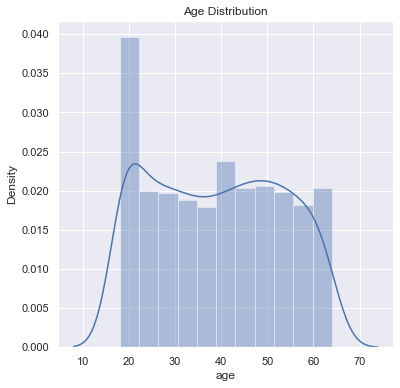

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()
#insurance_dataset['age'].value_counts()

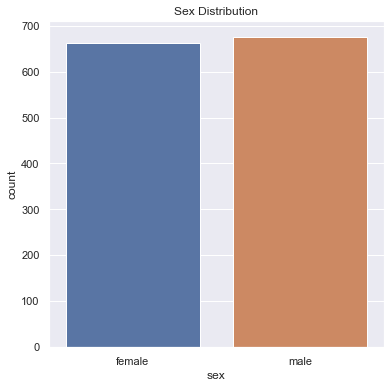

male      676
female    662
Name: sex, dtype: int64

In [10]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()
insurance_dataset['sex'].value_counts()

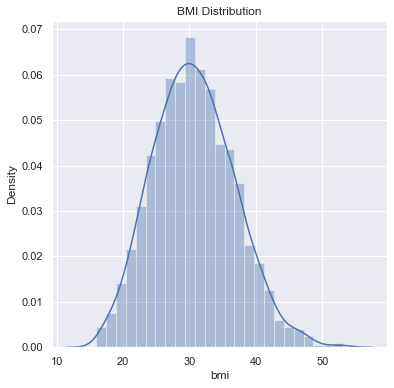

Normal BMI Range --> 18.5 to 24.9


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [11]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()
print("Normal BMI Range --> 18.5 to 24.9")
insurance_dataset['bmi'].value_counts()


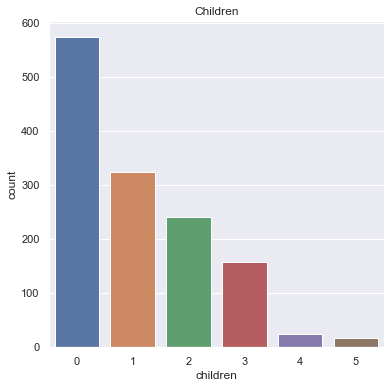

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [12]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()
insurance_dataset['children'].value_counts()

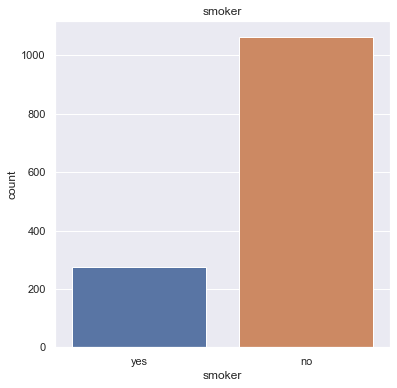

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()
insurance_dataset['smoker'].value_counts()

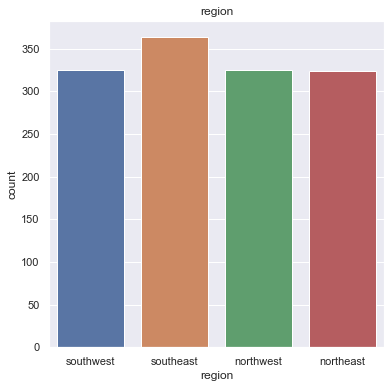

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()
insurance_dataset['region'].value_counts()

We have 0 missing values which is very good. Now let's do EDA with some cool graphs :) First we'll see how the charges are distributed according to given factors

Text(0.5, 1.0, 'Distribution of Charges')

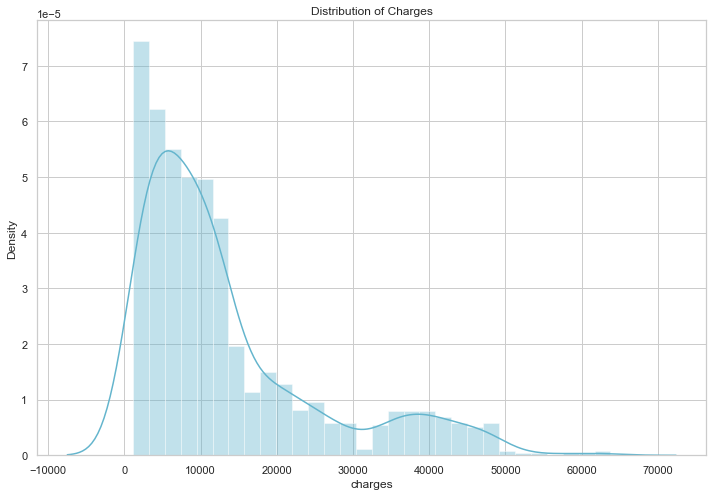

In [15]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(insurance_dataset['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

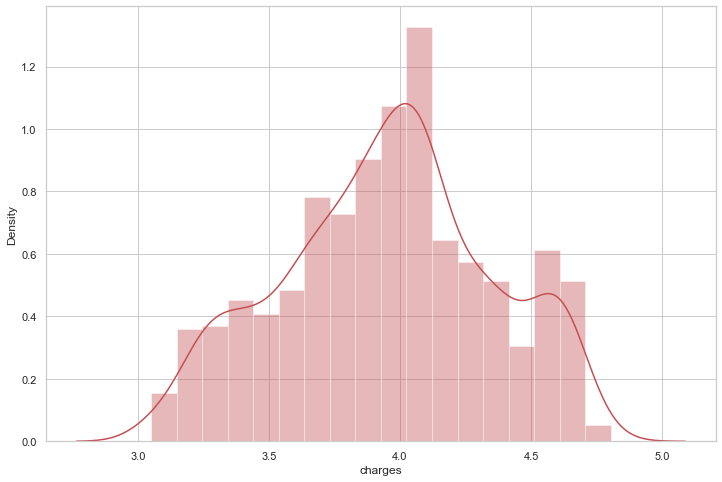

In [16]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(insurance_dataset['charges']), kde = True, color = 'r' )

Now let's look at the charges by region

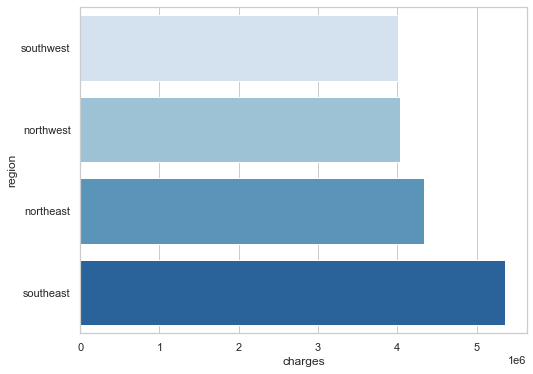

In [17]:
charges = insurance_dataset['charges'].groupby(insurance_dataset.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

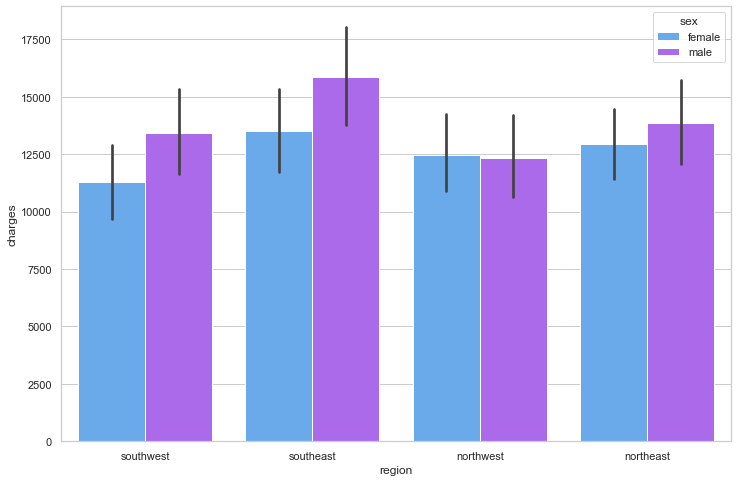

In [18]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=insurance_dataset, palette='cool')

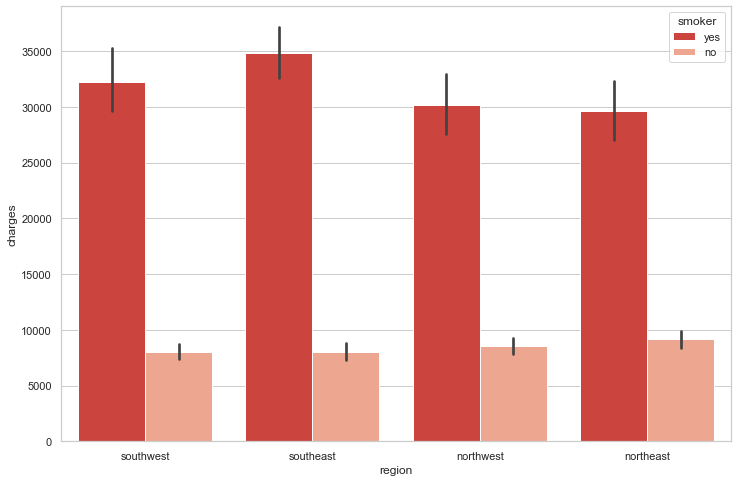

In [19]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=insurance_dataset, palette='Reds_r')

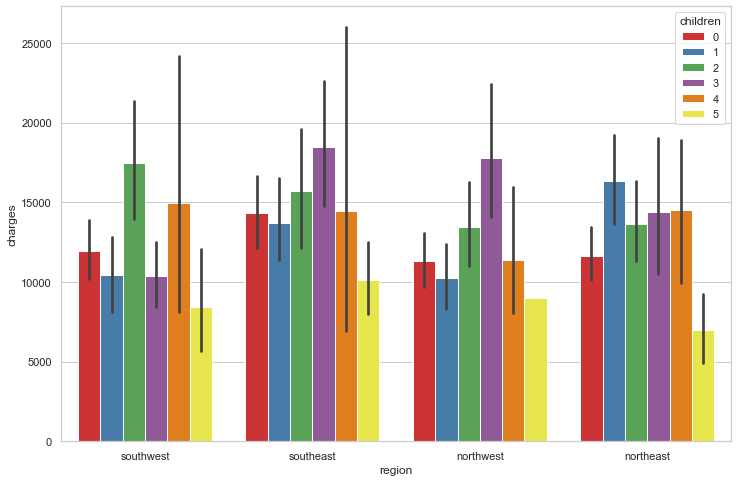

In [20]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=insurance_dataset, palette='Set1')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

Now let's analyze the medical charges by age, bmi and children according to the smoking factor

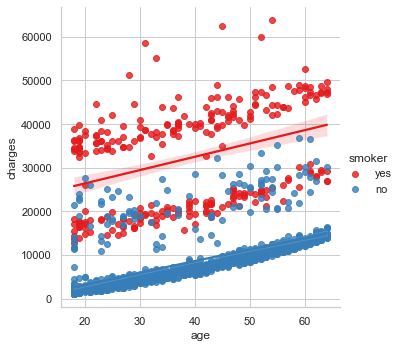

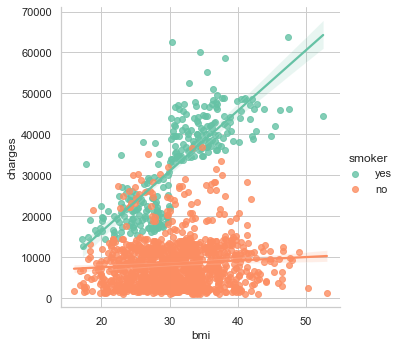

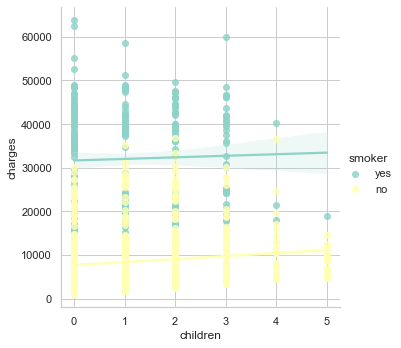

In [21]:
ax = sns.lmplot(x = 'age', y = 'charges', data=insurance_dataset, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=insurance_dataset, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=insurance_dataset, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

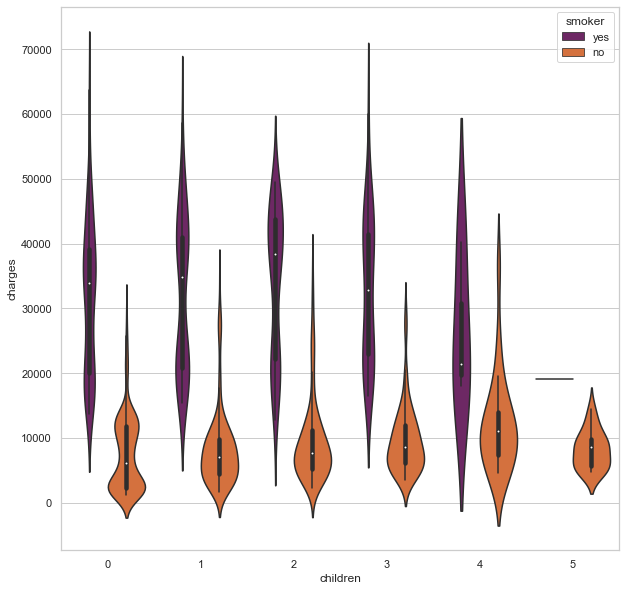

In [22]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=insurance_dataset,
                 orient='v', hue='smoker', palette='inferno')

No correlation, except with the smoking


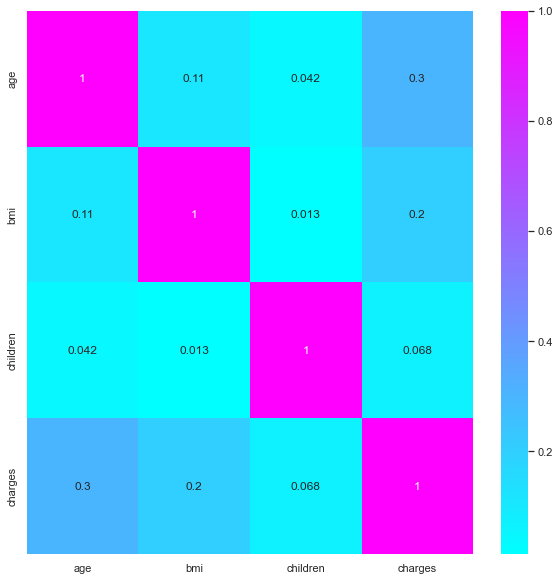

In [23]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(insurance_dataset.corr(), annot=True, cmap='cool')
print("No correlation, except with the smoking")

# Data Pre-Processing

Encoding the categorical features

In [24]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# Training Data

In [25]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']
X_train, X_test, Y_train, Y_test = training(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [26]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Linear regression Model



In [27]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, Y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(X_test, Y_test))

# prediction on training data
training_data_prediction =Lin_reg.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', r2_train)

# prediction on test data
test_data_prediction =Lin_reg.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)



11357.668742540909
[   251.40512196     26.11715966    330.64637157    580.27438296
 -23928.10171061    212.22242728]
0.7447273869684077
R squared value :  0.751505643411174
R squared value :  0.7447273869684077


In [28]:
input_data = (31,1,25.74,0,1,0)
# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
pred = Lin_reg.predict(input_data_reshaped)
print("\nResult As per Linear Regression Model",pred[0])


Result As per Linear Regression Model 3760.080576496048


<h4>The result we got is good enough, but we can try to improve it ,</h4>

# Ridge Regression Model

In [29]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(X_train, Y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(X_test, Y_test))

# prediction on training data
training_data_prediction =Ridge.predict(X_train)
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', r2_train)
# prediction on test data
test_data_prediction =Ridge.predict(X_test)
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)


pred = Ridge.predict(input_data_reshaped)
print("\nResult As per Ridge Regression Model",pred[0])

11310.898128470526
[ 2.51357264e+02  2.22920267e+01  3.30564931e+02  5.80347110e+02
 -2.38590739e+04  2.10878918e+02]
0.7447692592682709
R squared value :  0.7515003556886364
R squared value :  0.7447692592682709

Result As per Ridge Regression Model 3774.932773916369


# Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(X_train, Y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(X_test, Y_test))


# prediction on training data
training_data_prediction =Lasso.predict(X_train)
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', r2_train)
# prediction on test data
test_data_prediction =Lasso.predict(X_test)
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

pred = Lasso.predict(input_data_reshaped)
print("\nResult As per Lasso Regression Model",pred[0])

11358.166800069439
[   251.4045813      25.2243379     330.62503558    580.14496464
 -23926.77543909    212.01942325]
0.7447268316301134
R squared value :  0.7515056398728375
R squared value :  0.7447268316301134

Result As per Lasso Regression Model 3760.446135106


# RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor as rfr
X = insurance_dataset.drop(['charges'], axis=1)
Y = insurance_dataset.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(X_train,Y_train)
X_train_pred = Rfr.predict(X_train)
X_test_pred = Rfr.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(X_train_pred, Y_train),
       metrics.mean_squared_error(X_test_pred, Y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(Y_train,X_train_pred),
       metrics.r2_score(Y_test,X_test_pred)))

MSE train data: 3259012.061, MSE test data: 24470562.187
R2 train data: 0.978, R2 test data: 0.837


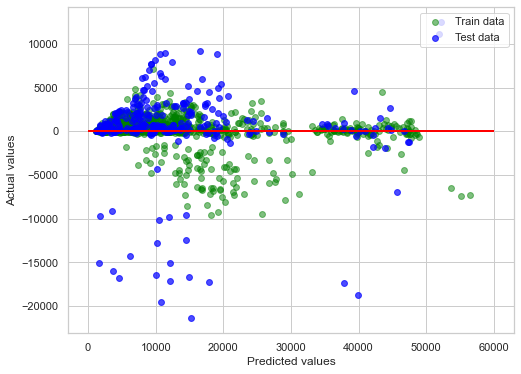

In [32]:
plt.figure(figsize=(8,6))

plt.scatter(X_train_pred, X_train_pred - Y_train,
          c = 'green', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(X_test_pred, X_test_pred - Y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.624974)
2.bmi(0.209540)
3.age(0.126567)
4.children(0.018869)
5.region(0.014484)
6.sex(0.005566)


<BarContainer object of 6 artists>

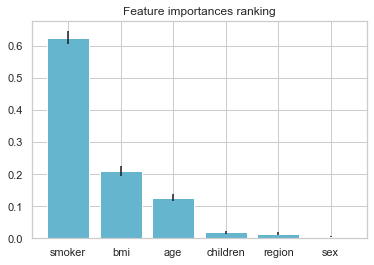

In [33]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances ranking")
plt.bar(importance_list, importances[indices],color="c", yerr=std[indices], align="center")

In [34]:
pred = Rfr.predict(input_data_reshaped)
print("\nResult As per Random Forest Regression Model",pred[0])


Result As per Random Forest Regression Model 3756.9123005000056


<h3>Awesome! Working Fine!!!!!!!</h3>

# Actual v/s Predictions Charges

<h3>Predictions using Random Forest Regressor</h3>

In [35]:
#Predicting the charges
Y_test_pred = Rfr.predict(X_test)
##Comparing the actual output values with the predicted values
rfr_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
rfr_pred

,Actual,Predicted
17,2395.17155,4856.267070
1091,11286.53870,11292.795745
273,9617.66245,14829.636576
270,1719.43630,2364.765137
874,8891.13950,9658.504983
...,...,...
232,1727.78500,2541.588371
323,11566.30055,16179.011476
1337,29141.36030,28815.740749
1066,8978.18510,9660.704910


<h3>Predictions using Lasso Regressor</h3>

In [36]:
##Predicting the charges
Y_test_pred = Lasso.predict(X_test)
##Comparing the actual output values with the predicted values
lasso_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
lasso_pred

,Actual,Predicted
17,2395.17155,1521.489551
1091,11286.53870,11570.451328
273,9617.66245,10083.114589
270,1719.43630,2247.276084
874,8891.13950,7881.823706
...,...,...
232,1727.78500,-1669.552200
323,11566.30055,15722.933424
1337,29141.36030,36966.398652
1066,8978.18510,12988.108770


<h3>Predictions using Ridge Regressor</h3>

In [37]:
##Predicting the charges
Y_test_pred = Ridge.predict(X_test)
##Comparing the actual output values with the predicted values
ridge_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
ridge_pred

,Actual,Predicted
17,2395.17155,1537.119928
1091,11286.53870,11581.275507
273,9617.66245,10097.452561
270,1719.43630,2265.294125
874,8891.13950,7897.186762
...,...,...
232,1727.78500,-1655.161023
323,11566.30055,15735.927211
1337,29141.36030,36908.142533
1066,8978.18510,13004.433400


<h3>Predictions using Linear Regressor</h3>

In [38]:
##Predicting the charges
Y_test_pred = Lin_reg.predict(X_test)
##Comparing the actual output values with the predicted values
lin_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_test_pred})
lin_pred

,Actual,Predicted
17,2395.17155,1520.592422
1091,11286.53870,11570.592018
273,9617.66245,10082.438499
270,1719.43630,2246.217543
874,8891.13950,7881.283620
...,...,...
232,1727.78500,-1669.890650
323,11566.30055,15722.419522
1337,29141.36030,36968.055645
1066,8978.18510,12987.364848


<p><b>Conclusion:</b> like we previously noticed <b>smoking</b> is the greatest factor that affects medical cost charges, then it's <b>bmi and age.<br/>  Random Forest Regression </b> turned out to be the best model </p>

<h2>Making a Predictive System</h2>

In [39]:
with open('insurance_rfr_model.pkl','wb')as f:
    pickle.dump(Rfr,f)
with open('insurance_lasso_model.pkl','wb')as f:
    pickle.dump(Lasso,f)
with open('insurance_linear_model.pkl','wb')as f:
    pickle.dump(Lin_reg,f)
with open('insurance_ridge_model.pkl','wb')as f:
    pickle.dump(Ridge,f)

In [40]:
with open('insurance_rfr_model.pkl','rb')as f:
    rfr_model = pickle.load(f)

In [41]:
input_data = (31,1,25.74,0,1,0)
# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfr_model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is Rs. ', prediction[0])

[3756.9123005]
The insurance cost is Rs.  3756.9123005000056
